# Analyze the sales of the company in order to target new areas of growth

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import pandas as pd
import statistics

In [2]:
transactions = pd.read_csv('transactions.csv')
print(transactions)

       id_prod                        date session_id client_id
0       0_1483  2021-04-10 18:37:28.723910    s_18746    c_4450
1        2_226  2022-02-03 01:55:53.276402   s_159142     c_277
2        1_374  2021-09-23 15:13:46.938559    s_94290    c_4270
3       0_2186  2021-10-17 03:27:18.783634   s_105936    c_4597
4       0_1351  2021-07-17 20:34:25.800563    s_63642    c_1242
...        ...                         ...        ...       ...
337011   1_671  2021-05-28 12:35:46.214839    s_40720    c_3454
337012   0_759  2021-06-19 00:19:23.917703    s_50568    c_6268
337013  0_1256  2021-03-16 17:31:59.442007     s_7219    c_4137
337014   2_227  2021-10-30 16:50:15.997750   s_112349       c_5
337015  0_1417  2021-06-26 14:38:19.732946    s_54117    c_6714

[337016 rows x 4 columns]


In [3]:
# How many missing values in data
transactions.isnull().sum().sum()

0

In [4]:
#Check missing by variable
transactions.isnull().sum()

id_prod       0
date          0
session_id    0
client_id     0
dtype: int64

In [5]:
print(type(transactions))

<class 'pandas.core.frame.DataFrame'>


In [6]:
products = pd.read_csv('products.csv')
print(products)

     id_prod   price  categ
0     0_1421   19.99      0
1     0_1368    5.13      0
2      0_731   17.99      0
3      1_587    4.99      1
4     0_1507    3.99      0
...      ...     ...    ...
3282    2_23  115.99      2
3283   0_146   17.14      0
3284   0_802   11.22      0
3285   1_140   38.56      1
3286  0_1920   25.16      0

[3287 rows x 3 columns]


In [7]:
#fproducts.isnull().sum()

id_prod    0
price      0
categ      0
dtype: int64

In [8]:
## left join
d = pd.merge(transactions, products, how='left', on=['id_prod'])
print(d)

       id_prod                        date session_id client_id  price  categ
0       0_1483  2021-04-10 18:37:28.723910    s_18746    c_4450   4.99    0.0
1        2_226  2022-02-03 01:55:53.276402   s_159142     c_277  65.75    2.0
2        1_374  2021-09-23 15:13:46.938559    s_94290    c_4270  10.71    1.0
3       0_2186  2021-10-17 03:27:18.783634   s_105936    c_4597   4.20    0.0
4       0_1351  2021-07-17 20:34:25.800563    s_63642    c_1242   8.99    0.0
...        ...                         ...        ...       ...    ...    ...
337011   1_671  2021-05-28 12:35:46.214839    s_40720    c_3454  31.99    1.0
337012   0_759  2021-06-19 00:19:23.917703    s_50568    c_6268  22.99    0.0
337013  0_1256  2021-03-16 17:31:59.442007     s_7219    c_4137  11.03    0.0
337014   2_227  2021-10-30 16:50:15.997750   s_112349       c_5  50.99    2.0
337015  0_1417  2021-06-26 14:38:19.732946    s_54117    c_6714  17.99    0.0

[337016 rows x 6 columns]


In [9]:
d.isnull().sum()
## production data has extra id_prod values that do not exist in transaction data, therefore there are null columns when
## these datasets are joined together

id_prod         0
date            0
session_id      0
client_id       0
price         103
categ         103
dtype: int64

In [17]:
filtered_df = df[df['id_prod'] == '0_1016']

# Display the filtered DataFrame
print(filtered_df)

Empty DataFrame
Columns: [id_prod, date, session_id, client_id, price, categ, sex, birth]
Index: []


In [12]:
#perform regular join instead
d1 = transactions.merge(products, left_on = 'id_prod', right_on ='id_prod')
print(d1)

       id_prod                        date session_id client_id   price  categ
0       0_1483  2021-04-10 18:37:28.723910    s_18746    c_4450    4.99      0
1       0_1483  2021-10-18 19:16:14.767807   s_106741    c_1576    4.99      0
2       0_1483  2021-11-14 11:11:45.276771   s_119491     c_182    4.99      0
3       0_1483  2021-07-30 19:37:16.087057    s_69222    c_1196    4.99      0
4       0_1483  2021-03-30 14:18:13.403218    s_13545    c_2890    4.99      0
...        ...                         ...        ...       ...     ...    ...
336908  0_1683  2021-12-24 04:37:46.407713   s_139091    c_5508    2.99      0
336909    2_98  2021-03-08 21:10:32.250919     s_3637    c_5967  149.74      2
336910   0_833  2021-09-27 23:22:40.394509    s_96558    c_8260    2.99      0
336911  0_1284  2021-04-14 13:13:06.560397    s_20477    c_1551    1.38      0
336912  0_1116  2021-07-27 04:02:53.408409    s_67633    c_3291    2.97      0

[336913 rows x 6 columns]


In [13]:
d1.isnull().sum()

id_prod       0
date          0
session_id    0
client_id     0
price         0
categ         0
dtype: int64

In [14]:
customers = pd.read_csv('customers.csv')
print(customers)

     client_id sex  birth
0       c_4410   f   1967
1       c_7839   f   1975
2       c_1699   f   1984
3       c_5961   f   1962
4       c_5320   m   1943
...        ...  ..    ...
8618    c_7920   m   1956
8619    c_7403   f   1970
8620    c_5119   m   1974
8621    c_5643   f   1968
8622      c_84   f   1982

[8623 rows x 3 columns]


In [15]:
customers.isnull().sum()

client_id    0
sex          0
birth        0
dtype: int64

In [16]:
df = d1.merge(customers, left_on = 'client_id', right_on ='client_id')
print(df)

       id_prod                        date session_id client_id  price  categ  \
0       0_1483  2021-04-10 18:37:28.723910    s_18746    c_4450   4.99      0   
1       0_1085  2021-09-29 11:14:59.793823    s_97382    c_4450   3.99      0   
2       0_1453  2021-08-27 19:50:46.796939    s_81509    c_4450   7.99      0   
3       0_1405  2021-08-27 20:07:25.878440    s_81509    c_4450   4.99      0   
4       0_1392  2021-12-28 11:45:04.072281   s_141302    c_4450   6.30      0   
...        ...                         ...        ...       ...    ...    ...   
336908   1_607  2021-09-25 07:26:00.224331    s_95185    c_4786  26.99      1   
336909   1_673  2021-06-01 00:49:49.781631    s_42350    c_2793  12.99      1   
336910  0_2075  2021-10-09 09:03:48.268536   s_102200    c_2793   8.99      0   
336911  0_1692  2021-09-15 19:42:08.596375    s_90430    c_4478  13.36      0   
336912   0_142  2021-09-25 18:07:25.880052    s_95415    c_1232  19.85      0   

       sex  birth  
0      

In [18]:
df.isnull().sum()

id_prod       0
date          0
session_id    0
client_id     0
price         0
categ         0
sex           0
birth         0
dtype: int64

##### Central tendency (Mean, Mode, Median) and Dispersion Measures (Variance and Standard Deviation)

In [19]:
round(statistics.mean(df['price']),2)

17.2

In [20]:
statistics.median(df['price'])

13.9

In [21]:
statistics.mode(df['price'])

15.99

In [22]:
round(statistics.variance(df['price']),2)

318.82

In [23]:
round(statistics.stdev(df['price']),2)

17.86

##### Lorenz curve and a Gini coefficient
###### are used to measure the variability of the distribution of income and wealth. Hence, Lorenz Curve is the measure of the deviation of the actual distribution of a statistical series from the line of equal distribution. The extent of this deviation is known as Lorenz Coefficient.

In [26]:
df = df.sort_values(by=['price'])
print(df2)

       id_prod                             date session_id client_id  price  \
336725     T_0  test_2021-03-01 02:30:02.237421        s_0      ct_1   -1.0   
336703     T_0  test_2021-03-01 02:30:02.237414        s_0      ct_1   -1.0   
336786     T_0  test_2021-03-01 02:30:02.237430        s_0      ct_0   -1.0   
336704     T_0  test_2021-03-01 02:30:02.237418        s_0      ct_1   -1.0   
336785     T_0  test_2021-03-01 02:30:02.237433        s_0      ct_0   -1.0   
...        ...                              ...        ...       ...    ...   
249749     2_2       2021-06-06 23:14:33.815188    s_45088    c_2467  300.0   
213098     2_2       2021-05-02 18:34:47.753888    s_28956    c_2329  300.0   
181445     2_2       2021-06-12 08:44:00.882917    s_47558    c_5237  300.0   
49842      2_2       2021-03-26 04:33:19.697459    s_11582    c_4958  300.0   
295762     2_2       2022-02-28 21:24:28.442508   s_172373     c_659  300.0   

        categ sex  birth  
336725      0   m   2001

In [28]:
##Calculate the cumulative sum of the sorted data and divide it by the total sum of the data 
df['cumulative_perc'] = df['price'].cumsum() / df['price'].sum() 
print(df)

       id_prod                             date session_id client_id  price  \
336725     T_0  test_2021-03-01 02:30:02.237421        s_0      ct_1   -1.0   
336837     T_0  test_2021-03-01 02:30:02.237440        s_0      ct_0   -1.0   
336836     T_0  test_2021-03-01 02:30:02.237435        s_0      ct_0   -1.0   
336835     T_0  test_2021-03-01 02:30:02.237444        s_0      ct_0   -1.0   
336834     T_0  test_2021-03-01 02:30:02.237416        s_0      ct_0   -1.0   
...        ...                              ...        ...       ...    ...   
49844      2_2       2021-12-04 15:45:14.708313   s_129351    c_4958  300.0   
249749     2_2       2021-06-06 23:14:33.815188    s_45088    c_2467  300.0   
213098     2_2       2021-05-02 18:34:47.753888    s_28956    c_2329  300.0   
181445     2_2       2021-06-12 08:44:00.882917    s_47558    c_5237  300.0   
295762     2_2       2022-02-28 21:24:28.442508   s_172373     c_659  300.0   

        categ sex  birth  cumulative_perc  
336725 

In [36]:
##Calculate the Gini coefficient 
area_under_curve = df['cumulative_perc'].sum() / len(df) 
area_between_curve_and_diagonal = 0.5 - area_under_curve 
gini_coefficient = area_between_curve_and_diagonal / 0.5 
print(f'The Gini coefficient is {gini_coefficient:.2f}')

The Gini coefficient is 0.39


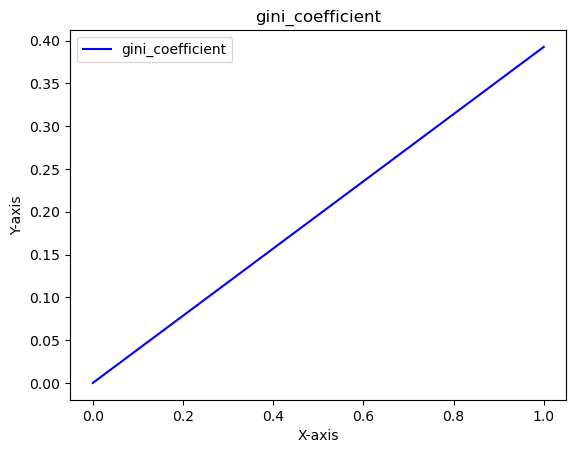

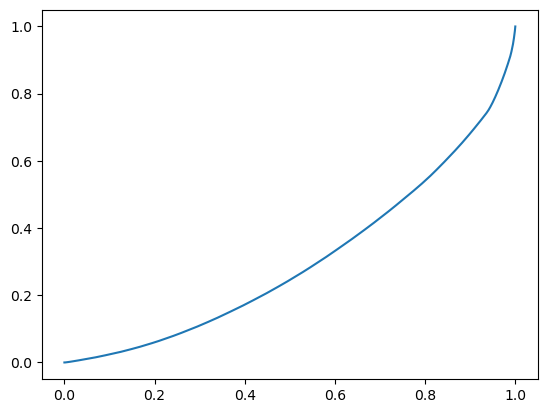

In [55]:
# Generate x values
x = np.linspace(0, 1, 10)

# Define the line equation with the desired gini_coefficient
y = gini_coefficient * x

# Plot the line
##plt.plot(x, y, label='Line with Coefficient 0.39', color='blue')

plt.plot(x, y, label='gini_coefficient', color='blue')

# Add labels and legend
plt.title('gini_coefficient')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend()

# Show the plot
plt.show()

##Calculate the Lorenz curve 
plt.plot(np.linspace(0, 1, len(df)), df['cumulative_perc'].values)

#### Graphic representations, including at least one histogram, a representation with boxplots, and a time series graph (i.e a graph in which the abscissa axis represents dates).

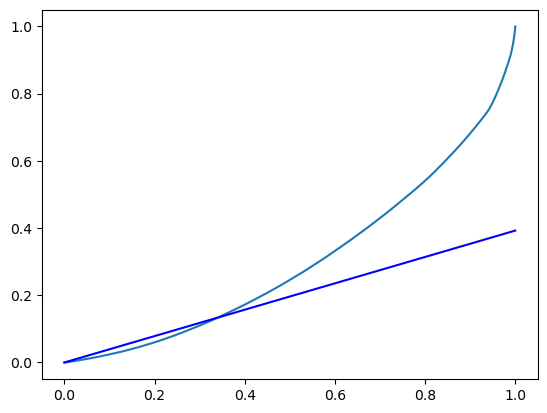

In [56]:
plt.plot(np.linspace(0, 1, len(df)), df['cumulative_perc'].values)
plt.plot(x, y, label='gini_coefficient', color='blue')